In [ ]:
!pip install deepctr_torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import gc

import torch
from deepctr_torch.inputs import SparseFeat, VarLenSparseFeat, get_feature_names
from deepctr_torch.models import DeepFM
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("/content/movielens_sample.txt")
sparse_features = ["movie_id", "user_id", "gender", "age", "occupation", "zip"]
target = ['rating']

In [ ]:
for feature in sparse_features:
    lbe = LabelEncoder()
    data[feature] = lbe.fit_transform(data[feature])

In [ ]:
fixlen_feature_columns = [SparseFeat(feature, data[feature].nunique()) for feature in sparse_features]
print(fixlen_feature_columns)
linear_feature_columns = fixlen_feature_columns
dnn_feature_columns = fixlen_feature_columns
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

[SparseFeat(name='movie_id', vocabulary_size=187, embedding_dim=4, use_hash=False, dtype='int32', embedding_name='movie_id', group_name='default_group'), SparseFeat(name='user_id', vocabulary_size=193, embedding_dim=4, use_hash=False, dtype='int32', embedding_name='user_id', group_name='default_group'), SparseFeat(name='gender', vocabulary_size=2, embedding_dim=4, use_hash=False, dtype='int32', embedding_name='gender', group_name='default_group'), SparseFeat(name='age', vocabulary_size=7, embedding_dim=4, use_hash=False, dtype='int32', embedding_name='age', group_name='default_group'), SparseFeat(name='occupation', vocabulary_size=20, embedding_dim=4, use_hash=False, dtype='int32', embedding_name='occupation', group_name='default_group'), SparseFeat(name='zip', vocabulary_size=188, embedding_dim=4, use_hash=False, dtype='int32', embedding_name='zip', group_name='default_group')]


In [ ]:
class MovieLensDataset(Dataset):

    def __init__(self, users, movies, ratings):
        self.users = users
        self.movies = movies
        self.ratings = ratings

    def __len__(self):
        return len(self.users)

    def __getitem__(self,idx):
        user = self.users[idx]
        movie = self.movies[idx]
        rating = self.ratings[idx]

        return {
               "users" : torch.tensor(user),
               "movies" : torch.tensor(movie),
               "ratings" : torch.tensor(rating)
                }

In [ ]:
train, test = train_test_split(data, test_size=0.2)
train_model_input = {name:train[name].values for name in feature_names}
test_model_input = {name:test[name].values for name in feature_names}

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df.like.values)
test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42, stratify=test_data.like.values)

In [ ]:
train_dataset = MovieLensDataset(train_data.user_id.values, train_data.movie_id.values, train_data.like.values)
val_dataset = MovieLensDataset(val_data.user_id.values, val_data.movie_id.values, val_data.like.values)
test_dataset = MovieLensDataset(test_data.user_id.values, test_data.movie_id.values, test_data.like.values)

In [ ]:
train_dl = DataLoader(train_dataset, batch_size=1024,shuffle=True)
val_dl = DataLoader(val_dataset, batch_size=1024,shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=1024,shuffle=True)

In [ ]:
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression')
model.compile("adam", "mse", metrics=['mse'], )
history = model.fit(train_model_input, train[target].values,
                    batch_size=256, epochs=100, verbose=True, validation_split=0.2,
                    validation_data=(test_model_input, test[target].values))

pred_ans = model.predict(test_model_input, batch_size=256)

cpu
Train on 160 samples, validate on 40 samples, 1 steps per epoch


1it [00:00, 39.92it/s]


Epoch 1/100
0s - loss:  14.0307 - mse:  14.0307 - val_mse:  13.9805


1it [00:00, 44.13it/s]


Epoch 2/100
0s - loss:  13.6721 - mse:  13.6721 - val_mse:  13.6913


1it [00:00, 47.03it/s]


Epoch 3/100
0s - loss:  13.3673 - mse:  13.3673 - val_mse:  13.4190


1it [00:00, 54.31it/s]


Epoch 4/100
0s - loss:  13.0793 - mse:  13.0793 - val_mse:  13.1618


1it [00:00, 42.20it/s]


Epoch 5/100
0s - loss:  12.8063 - mse:  12.8063 - val_mse:  12.9146


1it [00:00, 26.06it/s]


Epoch 6/100
0s - loss:  12.5429 - mse:  12.5429 - val_mse:  12.6580


1it [00:00, 39.23it/s]


Epoch 7/100
0s - loss:  12.2700 - mse:  12.2700 - val_mse:  12.3918


1it [00:00, 37.06it/s]


Epoch 8/100
0s - loss:  11.9874 - mse:  11.9874 - val_mse:  12.1158


1it [00:00, 53.49it/s]


Epoch 9/100
0s - loss:  11.6947 - mse:  11.6947 - val_mse:  11.8297


1it [00:00, 47.02it/s]


Epoch 10/100
0s - loss:  11.3918 - mse:  11.3918 - val_mse:  11.5335


1it [00:00, 29.47it/s]


Epoch 11/100
0s - loss:  11.0783 - mse:  11.0783 - val_mse:  11.2269


1it [00:00, 43.48it/s]


Epoch 12/100
0s - loss:  10.7540 - mse:  10.7540 - val_mse:  10.9098


1it [00:00, 46.71it/s]


Epoch 13/100
0s - loss:  10.4188 - mse:  10.4188 - val_mse:  10.5823


1it [00:00, 37.97it/s]


Epoch 14/100
0s - loss:  10.0725 - mse:  10.0725 - val_mse:  10.2443


1it [00:00, 53.26it/s]


Epoch 15/100
0s - loss:  9.7152 - mse:  9.7152 - val_mse:  9.8960


1it [00:00, 53.46it/s]


Epoch 16/100
0s - loss:  9.3468 - mse:  9.3468 - val_mse:  9.5375


1it [00:00, 51.43it/s]


Epoch 17/100
0s - loss:  8.9676 - mse:  8.9676 - val_mse:  9.1691


1it [00:00, 44.02it/s]


Epoch 18/100
0s - loss:  8.5779 - mse:  8.5779 - val_mse:  8.7913


1it [00:00, 36.05it/s]


Epoch 19/100
0s - loss:  8.1782 - mse:  8.1782 - val_mse:  8.4045


1it [00:00, 58.38it/s]


Epoch 20/100
0s - loss:  7.7690 - mse:  7.7690 - val_mse:  8.0096


1it [00:00, 37.35it/s]


Epoch 21/100
0s - loss:  7.3512 - mse:  7.3512 - val_mse:  7.6073


1it [00:00, 54.44it/s]


Epoch 22/100
0s - loss:  6.9259 - mse:  6.9259 - val_mse:  7.1987


1it [00:00, 39.73it/s]


Epoch 23/100
0s - loss:  6.4944 - mse:  6.4944 - val_mse:  6.7851


1it [00:00, 37.51it/s]


Epoch 24/100
0s - loss:  6.0582 - mse:  6.0582 - val_mse:  6.3680


1it [00:00, 54.03it/s]


Epoch 25/100
0s - loss:  5.6193 - mse:  5.6193 - val_mse:  5.9491


1it [00:00, 60.57it/s]


Epoch 26/100
0s - loss:  5.1800 - mse:  5.1800 - val_mse:  5.5305


1it [00:00, 52.26it/s]


Epoch 27/100
0s - loss:  4.7430 - mse:  4.7430 - val_mse:  5.1145


1it [00:00, 60.37it/s]


Epoch 28/100
0s - loss:  4.3112 - mse:  4.3112 - val_mse:  4.7036


1it [00:00, 32.88it/s]


Epoch 29/100
0s - loss:  3.8884 - mse:  3.8884 - val_mse:  4.3009


1it [00:00, 56.19it/s]


Epoch 30/100
0s - loss:  3.4784 - mse:  3.4784 - val_mse:  3.9097


1it [00:00, 51.84it/s]


Epoch 31/100
0s - loss:  3.0854 - mse:  3.0854 - val_mse:  3.5333


1it [00:00, 58.10it/s]


Epoch 32/100
0s - loss:  2.7143 - mse:  2.7143 - val_mse:  3.1756


1it [00:00, 57.42it/s]


Epoch 33/100
0s - loss:  2.3699 - mse:  2.3699 - val_mse:  2.8404


1it [00:00, 67.50it/s]


Epoch 34/100
0s - loss:  2.0570 - mse:  2.0570 - val_mse:  2.5316


1it [00:00, 64.17it/s]


Epoch 35/100
0s - loss:  1.7805 - mse:  1.7805 - val_mse:  2.2530


1it [00:00, 43.62it/s]


Epoch 36/100
0s - loss:  1.5447 - mse:  1.5447 - val_mse:  2.0077


1it [00:00, 60.91it/s]


Epoch 37/100
0s - loss:  1.3532 - mse:  1.3532 - val_mse:  1.7985


1it [00:00, 57.85it/s]


Epoch 38/100
0s - loss:  1.2082 - mse:  1.2082 - val_mse:  1.6266


1it [00:00, 22.92it/s]


Epoch 39/100
0s - loss:  1.1101 - mse:  1.1101 - val_mse:  1.4922


1it [00:00, 43.85it/s]


Epoch 40/100
0s - loss:  1.0564 - mse:  1.0564 - val_mse:  1.3934


1it [00:00, 63.83it/s]


Epoch 41/100
0s - loss:  1.0418 - mse:  1.0418 - val_mse:  1.3264


1it [00:00, 55.51it/s]


Epoch 42/100
0s - loss:  1.0579 - mse:  1.0579 - val_mse:  1.2857


1it [00:00, 53.28it/s]


Epoch 43/100
0s - loss:  1.0938 - mse:  1.0938 - val_mse:  1.2648


1it [00:00, 58.67it/s]


Epoch 44/100
0s - loss:  1.1373 - mse:  1.1373 - val_mse:  1.2566


1it [00:00, 44.04it/s]


Epoch 45/100
0s - loss:  1.1769 - mse:  1.1769 - val_mse:  1.2550


1it [00:00, 53.93it/s]


Epoch 46/100
0s - loss:  1.2027 - mse:  1.2027 - val_mse:  1.2554


1it [00:00, 64.53it/s]


Epoch 47/100
0s - loss:  1.2087 - mse:  1.2087 - val_mse:  1.2552


1it [00:00, 66.32it/s]

Epoch 48/100


0s - loss:  1.1925 - mse:  1.1925 - val_mse:  1.2538


1it [00:00, 52.46it/s]


Epoch 49/100
0s - loss:  1.1551 - mse:  1.1551 - val_mse:  1.2518


1it [00:00, 58.96it/s]


Epoch 50/100
0s - loss:  1.1005 - mse:  1.1005 - val_mse:  1.2509


1it [00:00, 40.34it/s]


Epoch 51/100
0s - loss:  1.0340 - mse:  1.0340 - val_mse:  1.2530


1it [00:00, 29.52it/s]


Epoch 52/100
0s - loss:  0.9613 - mse:  0.9613 - val_mse:  1.2597


1it [00:00, 59.33it/s]


Epoch 53/100
0s - loss:  0.8879 - mse:  0.8879 - val_mse:  1.2723


1it [00:00, 57.96it/s]


Epoch 54/100
0s - loss:  0.8182 - mse:  0.8182 - val_mse:  1.2912


1it [00:00, 60.27it/s]


Epoch 55/100
0s - loss:  0.7552 - mse:  0.7552 - val_mse:  1.3163


1it [00:00, 45.82it/s]


Epoch 56/100
0s - loss:  0.7007 - mse:  0.7007 - val_mse:  1.3466


1it [00:00, 61.36it/s]


Epoch 57/100
0s - loss:  0.6553 - mse:  0.6553 - val_mse:  1.3811


1it [00:00, 25.84it/s]


Epoch 58/100
0s - loss:  0.6184 - mse:  0.6184 - val_mse:  1.4180


1it [00:00, 40.49it/s]


Epoch 59/100
0s - loss:  0.5890 - mse:  0.5890 - val_mse:  1.4558


1it [00:00, 26.97it/s]


Epoch 60/100
0s - loss:  0.5655 - mse:  0.5655 - val_mse:  1.4929


1it [00:00, 44.89it/s]


Epoch 61/100
0s - loss:  0.5462 - mse:  0.5462 - val_mse:  1.5277


1it [00:00, 27.69it/s]


Epoch 62/100
0s - loss:  0.5294 - mse:  0.5294 - val_mse:  1.5592


1it [00:00, 57.99it/s]


Epoch 63/100
0s - loss:  0.5137 - mse:  0.5137 - val_mse:  1.5863


1it [00:00, 47.86it/s]


Epoch 64/100
0s - loss:  0.4978 - mse:  0.4978 - val_mse:  1.6084


1it [00:00, 52.36it/s]


Epoch 65/100
0s - loss:  0.4809 - mse:  0.4809 - val_mse:  1.6253


1it [00:00, 44.11it/s]


Epoch 66/100
0s - loss:  0.4624 - mse:  0.4624 - val_mse:  1.6367


1it [00:00, 45.07it/s]


Epoch 67/100
0s - loss:  0.4421 - mse:  0.4421 - val_mse:  1.6428


1it [00:00, 51.36it/s]


Epoch 68/100
0s - loss:  0.4200 - mse:  0.4200 - val_mse:  1.6442


1it [00:00, 53.34it/s]


Epoch 69/100
0s - loss:  0.3962 - mse:  0.3962 - val_mse:  1.6411


1it [00:00, 38.37it/s]


Epoch 70/100
0s - loss:  0.3714 - mse:  0.3714 - val_mse:  1.6344


1it [00:00, 47.69it/s]


Epoch 71/100
0s - loss:  0.3458 - mse:  0.3458 - val_mse:  1.6247


1it [00:00, 68.52it/s]


Epoch 72/100
0s - loss:  0.3202 - mse:  0.3202 - val_mse:  1.6128


1it [00:00, 39.75it/s]


Epoch 73/100
0s - loss:  0.2951 - mse:  0.2951 - val_mse:  1.5994


1it [00:00, 58.52it/s]


Epoch 74/100
0s - loss:  0.2710 - mse:  0.2710 - val_mse:  1.5853


1it [00:00, 32.12it/s]


Epoch 75/100
0s - loss:  0.2484 - mse:  0.2484 - val_mse:  1.5711


1it [00:00, 50.16it/s]


Epoch 76/100
0s - loss:  0.2275 - mse:  0.2275 - val_mse:  1.5574


1it [00:00, 36.08it/s]


Epoch 77/100
0s - loss:  0.2086 - mse:  0.2086 - val_mse:  1.5448


1it [00:00, 42.23it/s]


Epoch 78/100
0s - loss:  0.1916 - mse:  0.1916 - val_mse:  1.5338


1it [00:00, 45.57it/s]


Epoch 79/100
0s - loss:  0.1764 - mse:  0.1764 - val_mse:  1.5245


1it [00:00, 48.17it/s]


Epoch 80/100
0s - loss:  0.1630 - mse:  0.1630 - val_mse:  1.5174


1it [00:00, 39.99it/s]


Epoch 81/100
0s - loss:  0.1509 - mse:  0.1509 - val_mse:  1.5126


1it [00:00, 41.88it/s]


Epoch 82/100
0s - loss:  0.1400 - mse:  0.1400 - val_mse:  1.5101


1it [00:00, 33.74it/s]


Epoch 83/100
0s - loss:  0.1298 - mse:  0.1298 - val_mse:  1.5101


1it [00:00, 31.71it/s]


Epoch 84/100
0s - loss:  0.1202 - mse:  0.1202 - val_mse:  1.5126


1it [00:00, 34.16it/s]


Epoch 85/100
0s - loss:  0.1109 - mse:  0.1109 - val_mse:  1.5174


1it [00:00, 33.20it/s]


Epoch 86/100
0s - loss:  0.1019 - mse:  0.1019 - val_mse:  1.5244


1it [00:00, 34.53it/s]


Epoch 87/100
0s - loss:  0.0930 - mse:  0.0930 - val_mse:  1.5336


1it [00:00, 31.17it/s]


Epoch 88/100
0s - loss:  0.0844 - mse:  0.0844 - val_mse:  1.5446


1it [00:00, 27.53it/s]


Epoch 89/100
0s - loss:  0.0761 - mse:  0.0761 - val_mse:  1.5573


1it [00:00, 52.55it/s]


Epoch 90/100
0s - loss:  0.0682 - mse:  0.0682 - val_mse:  1.5713


1it [00:00, 59.98it/s]


Epoch 91/100
0s - loss:  0.0609 - mse:  0.0609 - val_mse:  1.5864


1it [00:00, 32.14it/s]


Epoch 92/100
0s - loss:  0.0541 - mse:  0.0541 - val_mse:  1.6021


1it [00:00, 27.13it/s]

Epoch 93/100


0s - loss:  0.0481 - mse:  0.0481 - val_mse:  1.6181


1it [00:00, 48.78it/s]


Epoch 94/100
0s - loss:  0.0429 - mse:  0.0429 - val_mse:  1.6340


1it [00:00, 48.51it/s]


Epoch 95/100
0s - loss:  0.0383 - mse:  0.0383 - val_mse:  1.6496


1it [00:00, 61.31it/s]


Epoch 96/100
0s - loss:  0.0344 - mse:  0.0344 - val_mse:  1.6644


1it [00:00, 53.30it/s]


Epoch 97/100
0s - loss:  0.0312 - mse:  0.0312 - val_mse:  1.6782


1it [00:00, 45.59it/s]


Epoch 98/100
0s - loss:  0.0285 - mse:  0.0285 - val_mse:  1.6908


1it [00:00, 60.79it/s]


Epoch 99/100
0s - loss:  0.0262 - mse:  0.0262 - val_mse:  1.7020


1it [00:00, 72.28it/s]

Epoch 100/100
0s - loss:  0.0243 - mse:  0.0243 - val_mse:  1.7117


In [ ]:
mse = round(mean_squared_error(test[target].values, pred_ans), 4)
rmse = mse ** 0.5
print("test RMSE", rmse)

test RMSE 1.30831953283592


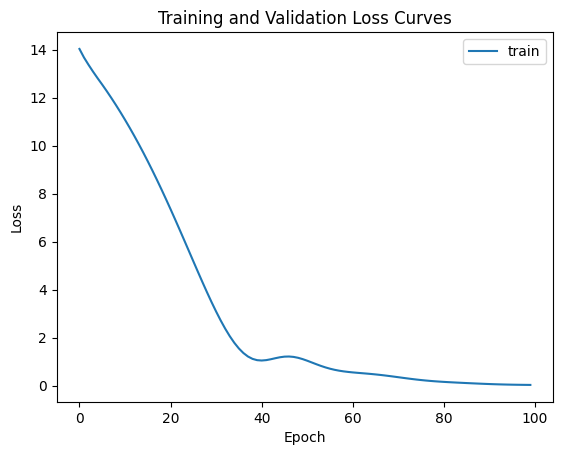

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_curve,auc

In [ ]:
movies_df = pd.read_table("/content/movies.dat",sep="::",names=['id','title','genres'],encoding='latin-1')
ratings_df = pd.read_table("/content/ratings.dat",sep="::",names=['user_id','movie_id','rating','timestamp'])

<ipython-input-13-c984ab93e877>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_table("/content/movies.dat",sep="::",names=['id','title','genres'],encoding='latin-1')
<ipython-input-13-c984ab93e877>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings_df = pd.read_table("/content/ratings.dat",sep="::",names=['user_id','movie_id','rating','timestamp'])


In [ ]:
ratings_df = pd.merge(ratings_df, movies_df, how='left', left_on='movie_id', right_on='id')
ratings_df.head()

,user_id,movie_id,rating,timestamp,id,title,genres
0,1,1193,5,978300760,1193,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,661,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,914,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,3408,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [ ]:
ratings_df.describe()

,user_id,movie_id,rating,timestamp,id
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,1.865540e+03
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1.096041e+03
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,1.030000e+03
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,1.835000e+03
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,2.770000e+03
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,3.952000e+03


<Axes: ylabel='Frequency'>

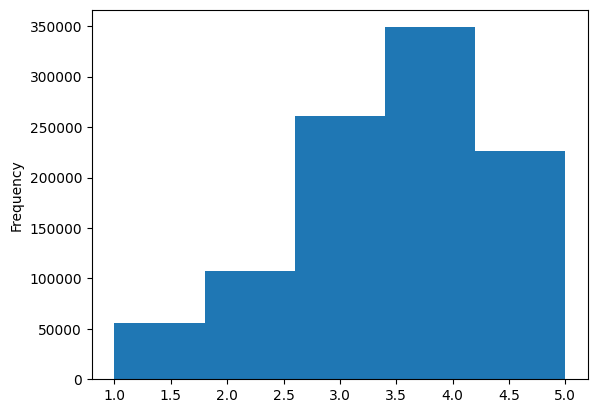

In [ ]:
ratings_df.rating.plot.hist(bins=5)

In [ ]:
movie_stats = ratings_df.groupby("movie_id",as_index=False).aggregate(
    {'user_id' : 'count', 'rating' : 'mean'}).rename(columns={'user_id' : '#watch', 'rating' : 'avg_rating'})

movie_stats = pd.merge(movie_stats,movies_df,how='left',left_on='movie_id',right_on='id')[['title','#watch','avg_rating']]
movie_stats.head()

,title,#watch,avg_rating
0,Toy Story (1995),2077,4.146846
1,Jumanji (1995),701,3.201141
2,Grumpier Old Men (1995),478,3.016736
3,Waiting to Exhale (1995),170,2.729412
4,Father of the Bride Part II (1995),296,3.006757


[Text(0, 0, '3428'),
 Text(0, 0, '2991'),
 Text(0, 0, '2990'),
 Text(0, 0, '2883'),
 Text(0, 0, '2672'),
 Text(0, 0, '2653'),
 Text(0, 0, '2649'),
 Text(0, 0, '2590'),
 Text(0, 0, '2583'),
 Text(0, 0, '2578')]

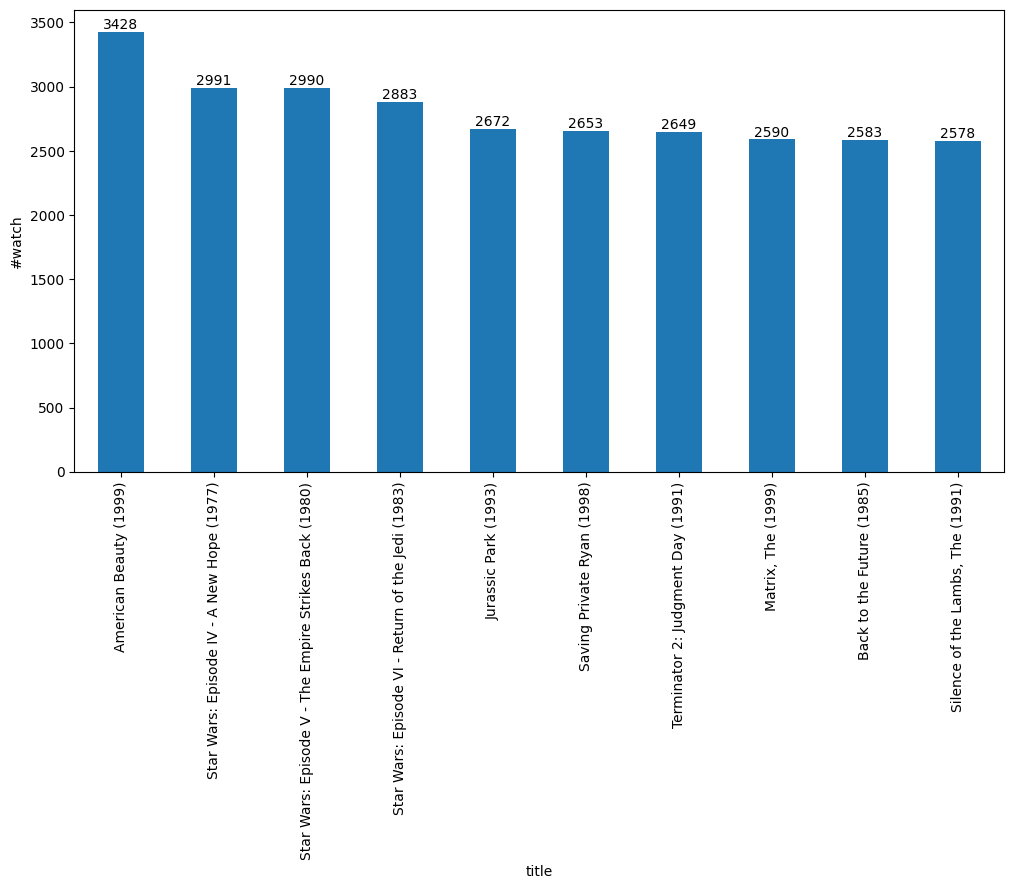

In [ ]:
# top 10 most popular movies
ax = movie_stats.sort_values(by=['#watch'],ascending=False)[:10].plot(x='title',y='#watch',kind='bar',figsize=(12,6),legend=False,ylabel='#watch')
ax.bar_label(ax.containers[0])

[Text(0, 0, '4.55456'),
 Text(0, 0, '4.52497'),
 Text(0, 0, '4.51711'),
 Text(0, 0, '4.51042'),
 Text(0, 0, '4.47772'),
 Text(0, 0, '4.47619'),
 Text(0, 0, '4.45369'),
 Text(0, 0, '4.44989'),
 Text(0, 0, '4.41282'),
 Text(0, 0, '4.40626')]

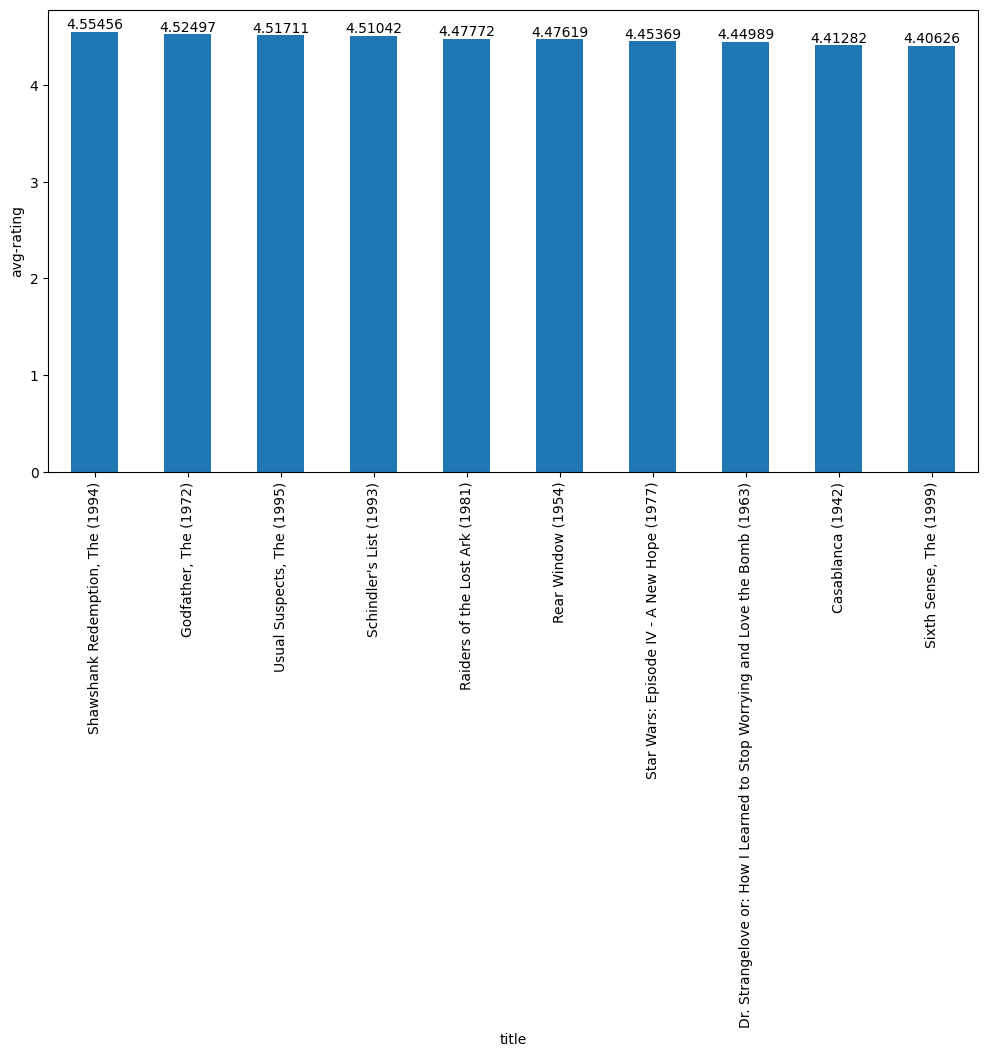

In [ ]:
# top 10 most liked movies
ax = movie_stats[movie_stats['#watch'] >= 1000].sort_values(by=['avg_rating'],ascending=False)[:10].plot(x='title',y='avg_rating',kind='bar',figsize=(12,6),legend=False,ylabel='avg-rating')
ax.bar_label(ax.containers[0])

In [ ]:
# ratings are converted to binary since we will be working on ctr or like prediction
# 3 and below ratings are considered as dislike, 4 and 5 are considered as like
ratings_df.loc[ratings_df.rating <= 3,'rating'] = 0
ratings_df.loc[ratings_df.rating > 3,'rating'] = 1

In [ ]:
ratings_df['rating'].value_counts()

1    575281
0    424928
Name: rating, dtype: int64

In [ ]:
# define label encoders for movies and users
user_encoder = preprocessing.LabelEncoder()
movie_encoder = preprocessing.LabelEncoder()

In [ ]:
# make sure that all user and movie ids start from 1
ratings_df.user_id = user_encoder.fit_transform(ratings_df.user_id.values)
ratings_df.movie_id = movie_encoder.fit_transform(ratings_df.movie_id.values)

In [ ]:
user_count = len(ratings_df['user_id'].unique())
movie_count = len(ratings_df['movie_id'].unique())

In [ ]:
class CollaborativeFilteringModel(nn.Module):
    def __init__(self,n_users,n_movies,emb_dim=32):
        super().__init__()
        self.user_embeddings = nn.Embedding(n_users,emb_dim)
        self.movie_embeddings = nn.Embedding(n_movies,emb_dim)

        self.cosine_sim = nn.CosineSimilarity(dim=1, eps=1e-6)

    def forward(self,user,movie):
        user_emb = self.user_embeddings(user)
        movie_emb = self.movie_embeddings(movie)

        # apply cosine similarity to user-movie embeddings and scale it between 0-1
        # if user and movie embeddings are similar, that means higher chance to user to like the movie
        output = (self.cosine_sim(user_emb,movie_emb) + 1) / 2

        return output

In [ ]:
model = CollaborativeFilteringModel(user_count,movie_count,emb_dim=64)
model.to(device)

CollaborativeFilteringModel(
  (user_embeddings): Embedding(6040, 64)
  (movie_embeddings): Embedding(3706, 64)
  (cosine_sim): CosineSimilarity()
)

In [ ]:
def recommend_movies(user_id,top_k=10):
    # get all the movie_ids
    unique_movies = ratings_df.movie_id.unique()
    # get the movie_ids that are watched by the user
    watched_movies_by_user = ratings_df[ratings_df['user_id'] == user_id]['movie_id'].values
    # get the movie_ids that are not watched by the user
    not_watched_movies = torch.tensor(list(set(unique_movies) - set(watched_movies_by_user)))
    # create a tensor filled with user_id to fed the model
    user = torch.full((1,not_watched_movies.shape[0]),user_id)
    user = torch.squeeze(user)

    with torch.no_grad():
        # make the prediction
        user = user.to(device)
        not_watched_movies = not_watched_movies.to(device)
        movies = model(user,not_watched_movies)

    movies = torch.unsqueeze(movies,1)
    movies = torch.cat([torch.unsqueeze(not_watched_movies,1),movies],dim=1)
    # get the top k movies
    movies = movies[movies[:, 1].sort(descending=True)[1]]
    top_k_movies = movies[:top_k,:]
    movie_ids = top_k_movies[:,0].to(int).tolist()

    # create a recommendation dataframe
    recommended_movies = pd.DataFrame()
    for idx,m_id in enumerate(movie_ids):
        movie_row = ratings_df[ratings_df['movie_id']==m_id].iloc[0,:]
        title = movie_row.title
        genres = movie_row.genres

        recommended_movies.at[idx,'movie_id'] = m_id
        recommended_movies.at[idx,'score'] = top_k_movies[idx,1].item()
        recommended_movies.at[idx,'title'] = title
        recommended_movies.at[idx,'genres'] = genres

    return recommended_movies

In [ ]:
top_k_movies = 5
user_id = random.randint(0,user_count+1)

print(f"Recommendations for user: {user_id}")
recommend_movies(user_id,top_k_movies)

Recommendations for user: 482


,movie_id,score,title,genres
0,1174.0,0.749731,Unforgiven (1992),Western
1,3615.0,0.726601,"Replacements, The (2000)",Comedy
2,1698.0,0.717164,Woo (1998),Comedy|Romance
3,2066.0,0.711900,Parasite (1982),Horror|Sci-Fi
4,548.0,0.699330,Welcome to the Dollhouse (1995),Comedy|Drama
